# Artículo: An Optimal Filter of the Second Order

Implementación del artículo *An Optimal Filter of the Second Order* para el filtrado de ruido en imágenes. Primeramente se presenta el filtrado de una imágen con el ruido planteado en el artículo. El siguiente ejemplo se presenta otra imagen donde se le agrega ruido gaussiano con media 1 y una desviación estándar de 0.7. Luego se desarrolla otro filtrado de imágen, pero con un tipo de ruido sal y pimienta. Por ultimo se pone a prueba el filtro en segundo orden de una imágen a la que se le induce un efector de difuminasión (*Motion blur*).

In [9]:
function X_noise = add_noise(X)
    N1 = randn(512);
    N2 = rand(512);

    X_noise = (0.5 * N1) +  (2 * N2) .* X;
end

In [7]:
function X_estim = filter_so(X, Y)

    X1 = X(1:171, :);
    X2 = X(172:342, :);
    X3 = X(343:512, :);

    Y1 = Y(1:171, :);
    Y2 = Y(172:342, :);
    Y3 = Y(343:512, :);

    Z1 = Y1 .* Y1;
    Z2 = Y2 .* Y2;
    Z3 = Y3 .* Y3;

    % Aproximación de las Matrices de Covarianza
    
     s = 512;

    Exz1 = (1/s) * X1 * Z1';
    Exz2 = (1/s) * X2 * Z2';
    Exz3 = (1/s) * X3 * Z3';

    Exy1 = (1/s) * X1 * Y1';
    Exy2 = (1/s) * X2 * Y2';
    Exy3 = (1/s) * X3 * Y3';

    Eyy1 = ((1/s) * Y1) * Y1';
    Eyy2 = ((1/s) * Y2) * Y2';
    Eyy3 = ((1/s) * Y3) * Y3';

    Eyz1 = (1/s) * Y1 * Z1';
    Eyz2 = (1/s) * Y2 * Z2';
    Eyz3 = (1/s) * Y3 * Z3';

    Ezy1 = (1/s) * Z1 * Y1';
    Ezy2 = (1/s) * Z2 * Y2';
    Ezy3 = (1/s) * Z3 * Y3';

    Ezz1 = ((1/s) * Z1) * Z1';
    Ezz2 = ((1/s) * Z2) * Z2';
    Ezz3 = ((1/s) * Z3) * Z3';

    A1 = Ezz1 - Ezy1 * pinv(Eyy1) * Ezy1;
    A2 = Ezz2 - Ezy2 * pinv(Eyy2) * Ezy2;
    A3 = Ezz3 - Ezy3 * pinv(Eyy3) * Ezy3;

    B1 = (Exz1 - Exy1 * pinv(Eyy1) * Eyz1) * pinv(A1);
    B2 = (Exz2 - Exy2 * pinv(Eyy2) * Eyz2) * pinv(A2);
    B3 = (Exz3 - Exy3 * pinv(Eyy3) * Eyz3) * pinv(A3);

    F01_1 = (Exy1 - B1 * Ezy1) * pinv(Eyy1);
    F01_2 = (Exy2 - B2 * Ezy2) * pinv(Eyy2);
    F01_3 = (Exy3 - B3 * Ezy3) * pinv(Eyy3);

    F02_1 = B1;
    F02_2 = B2;
    F02_3 = B3;

    F12_1 = (F01_1 * Y1) + (F02_1 * pow2(Y1)); 
    F12_2 = (F01_2 * Y2) + (F02_2 * pow2(Y2)); 
    F12_3 = (F01_3 * Y3) + (F02_3 * pow2(Y3)); 

%     E1 = norm(X1 - F12_1);
%     E2 = norm(X2 - F12_2);
%     E3 = norm(X3 - F12_3);

    X_estim  = [F12_1; F12_2; F12_3];
end


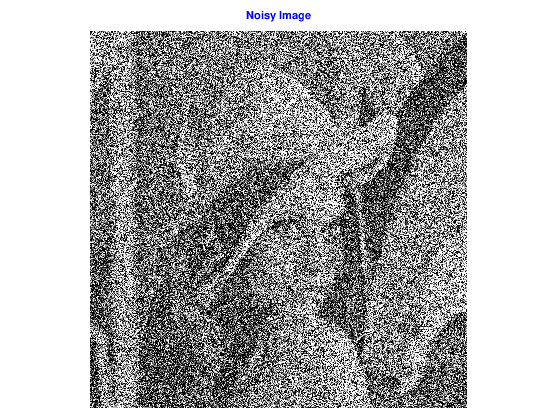

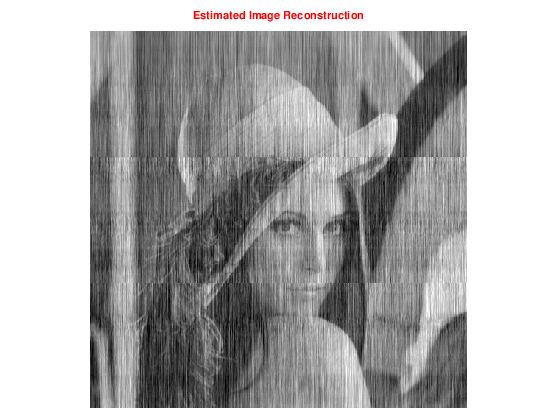

In [14]:
X = im2double(imread('lena512.png'));
X_noise = add_noise(X);

figure;
imshow(X_noise);
title('Noisy Image','Color', 'blue')
hold on;

X_estim = filter_so(X, X_noise);

figure;
imshow(X_estim);
title('Estimated Image Reconstruction','Color', 'red')
hold on;

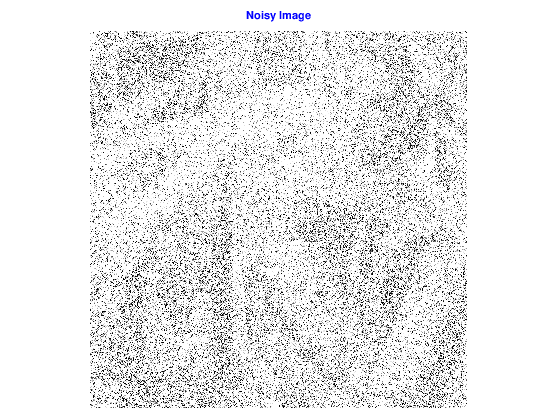

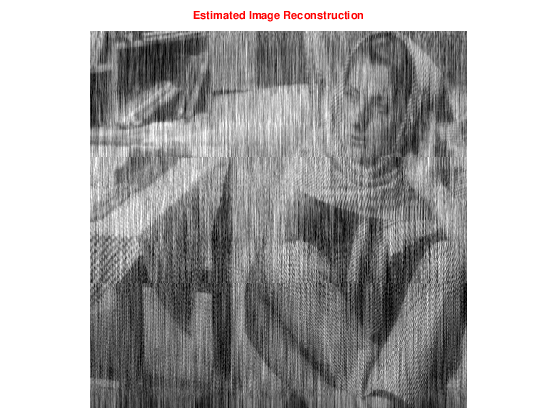

In [17]:
pkg load image;
X = im2double(imread('barbara.png'));
X_noise = imnoise(X, "gaussian", 1, 0.7);

figure;
imshow(X_noise);
title('Noisy Image','Color', 'blue')
hold on;

X_estim = filter_so(X, X_noise);

figure;
imshow(X_estim);
title('Estimated Image Reconstruction','Color', 'red')
hold on;

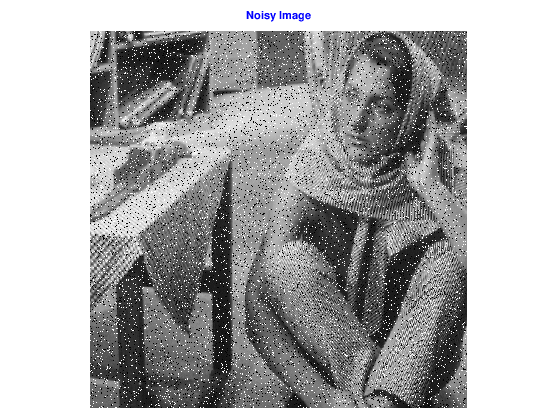

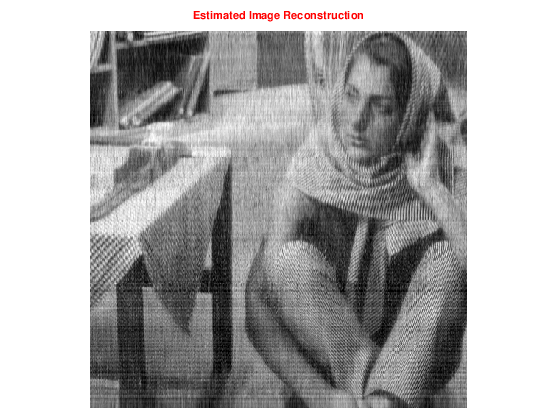

In [22]:
X = im2double(imread('barbara.png'));
X_noise = imnoise(X, "salt & pepper", 0.1);

figure;
imshow(X_noise);
title('Noisy Image','Color', 'blue')
hold on;

X_estim = filter_so(X, X_noise);

figure;
imshow(X_estim);
title('Estimated Image Reconstruction','Color', 'red')
hold on;

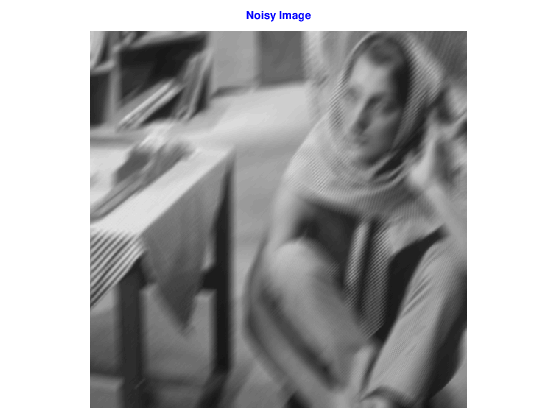

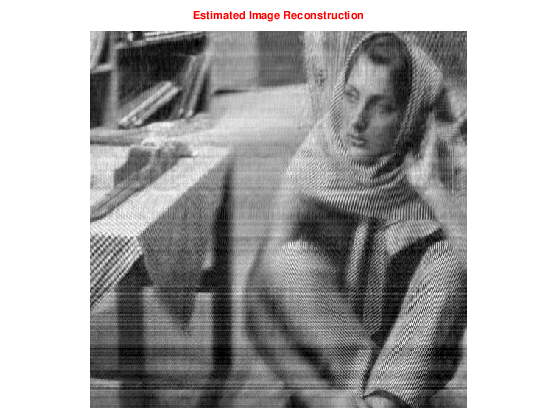

In [24]:
X = im2double(imread('barbara.png'));
H = fspecial('motion',20,45);
X_noise = imfilter(X,H,'replicate');;

figure;
imshow(X_noise);
title('Noisy Image','Color', 'blue')
hold on;

X_estim = filter_so(X, X_noise);

figure;
imshow(X_estim);
title('Estimated Image Reconstruction','Color', 'red')
hold on;